Revision

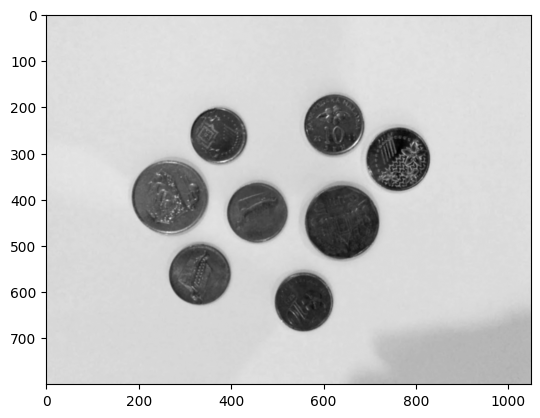

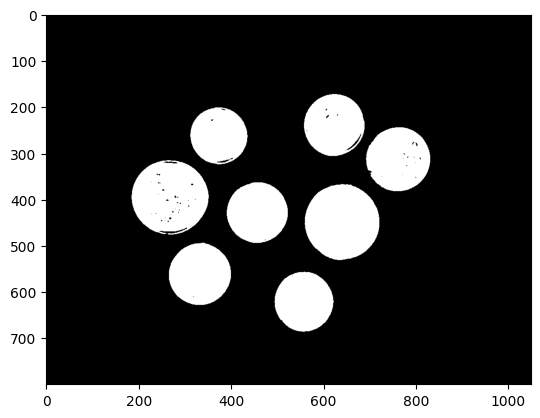

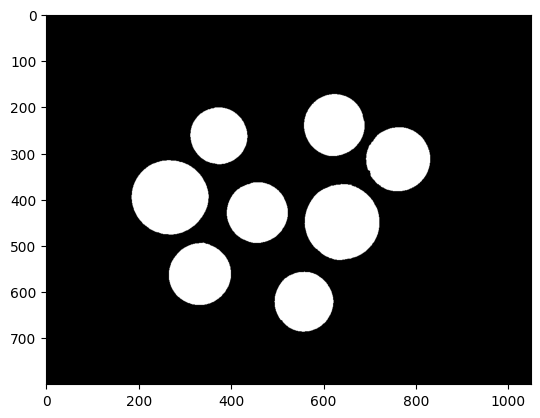

Area of contour 0  is  12647.0
Area of contour 1  is  13860.5
Area of contour 2  is  20442.5
Area of contour 3  is  13345.0
Area of contour 4  is  20623.0
Area of contour 5  is  14790.5
Area of contour 6  is  11673.5
Area of contour 7  is  13538.5


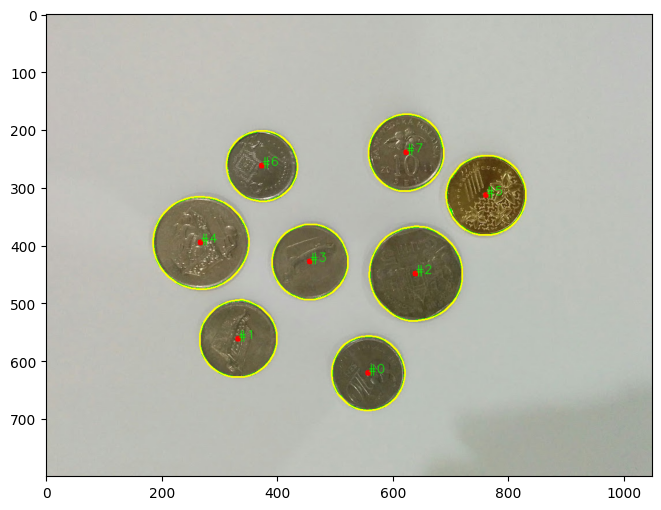

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import sys

# read the image
image = cv2.imread('images/coins.jpg')

# convert to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

KernelSize = (5, 5)
grayblur = cv2.GaussianBlur(src=gray, ksize=KernelSize, sigmaX=0, sigmaY=0)
plt.imshow(grayblur, cmap="gray")
plt.show()

# create a binary thresholded image
_, binary = cv2.threshold(grayblur, 150, 255, cv2.THRESH_BINARY_INV)
# show it
plt.imshow(binary, cmap="gray")
plt.show()

kernel = np.ones((9,9),np.uint8)
closed= cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)
plt.imshow(closed, cmap="gray")
plt.show()


# find the contours from the thresholded image
contours, hierarchy = cv2.findContours(closed, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

image = cv2.drawContours(image, contours, -1, (0, 255, 0), 2)

#iterate through contours list
count=0
for c in contours:
    M = cv2.moments(c)
    #print(M)
    cX = int(M['m10']/M['m00'])
    cY = int(M['m01']/M['m00'])

    #drawing centroids
    cv2.circle(image, (cX, cY), 5, (255, 0, 0), -1)
    cv2.drawContours(image, c, 0, (0, 255, 0), 2)

    #drawing convex hull
    hull = cv2.convexHull(c)
    cv2.drawContours(image, [hull], 0, (255, 255, 0), 2)

        # print coin ID at centroid
    label = f"#{count}"
    cv2.putText(
        image,
        label,
        (cX, cY),
        cv2.FONT_HERSHEY_SIMPLEX,
        0.7,
        (0, 255, 0),
        1,
        cv2.LINE_AA
    )

    area = cv2.contourArea(c)
    print('Area of contour', count, ' is ',area)
    count+=1
plt.figure(figsize= (12, 6))
# show the image with the drawn contours
plt.imshow(image)
plt.show()
